In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
%matplotlib inline

# Naive Bayes

In [2]:
# Load data.
data = load_iris()

In [3]:
# Display the description.
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# Explanatory variables.
X = data['data']
columns = list(data['feature_names'])
print(columns)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Response variable.
Y = data['target']
labels = list(data['target_names'])
print(labels)

['setosa', 'versicolor', 'virginica']


In [6]:
target = data.target
df = data.data
sns.set()
df = pd.DataFrame(df, columns=columns)
df['target'] = target
df['label'] = df.apply(lambda x: labels[int(x.target)], axis=1)

In [7]:
df.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  ...  target      label
0                  5.1               3.5  ...       0     setosa
1                  4.9               3.0  ...       0     setosa
2                  4.7               3.2  ...       0     setosa
3                  4.6               3.1  ...       0     setosa
4                  5.0               3.6  ...       0     setosa
..                 ...               ...  ...     ...        ...
145                6.7               3.0  ...       2  virginica
146                6.3               2.5  ...       2  virginica
147                6.5               3.0  ...       2  virginica
148                6.2               3.4  ...       2  virginica
149                5.9               3.0  ...       2  virginica

[150 rows x 6 columns]>

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


visualize the frequency table  of the labels using barplot

In [9]:
iris_df=pd.DataFrame(data.data)
iris_df['class']=data.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df["class"].replace({0: "setosa", 1: "versicolor",2: "virginica"}, inplace=True)

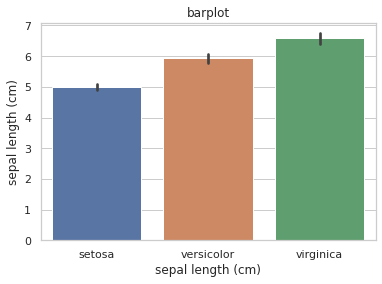

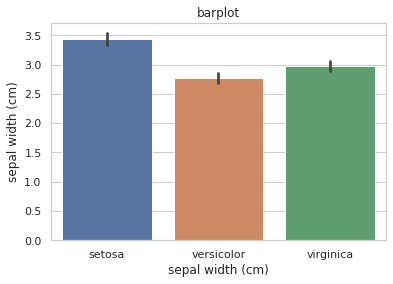

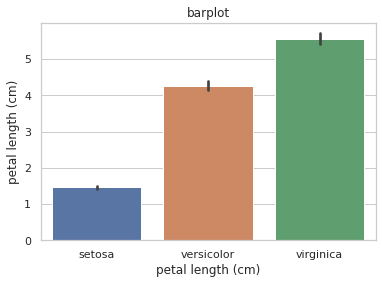

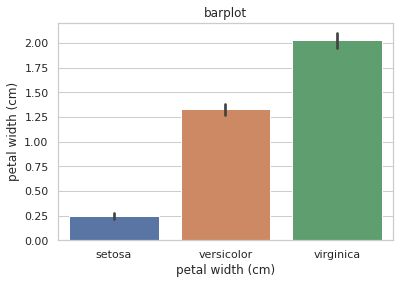

In [10]:
F = ['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for x in F:
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x="label", y=x, data=df)
    plt.title('barplot')
    plt.xlabel(f"{x}")
    plt.show()

plot a pairplot of your dataset , and use the class values in hue to label your scatter points

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


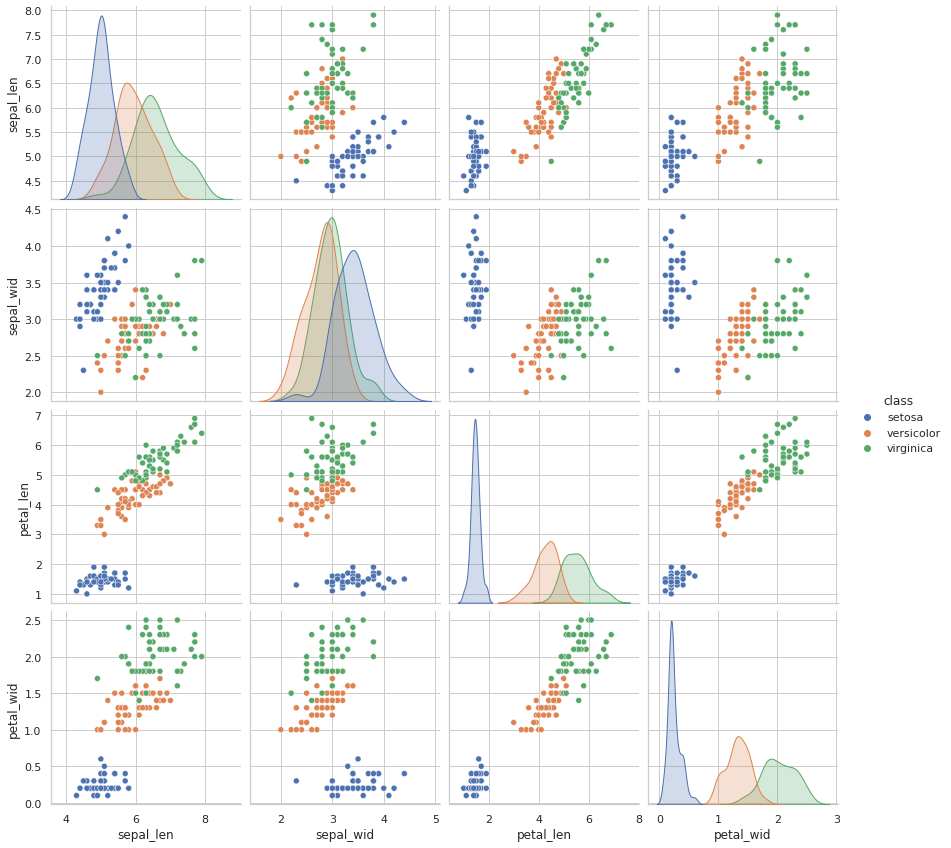

In [11]:
sns.set_style("whitegrid")
sns.pairplot(iris_df,hue="class",size=3)
plt.show()

split your dataset to train and test set  **(set test_size to 30% )**

In [12]:
# Split the dataset into training and testing.
X_train,X_test,Y_train,Y_test=train_test_split(data.data,data.target,test_size=0.3,random_state=1)

fit a GaussianNB on train set and make prediction on testset

In [13]:
# Train and predict.
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_pred

array([0, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

use the previous result and plot the confusion matrix

In [14]:
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(Y_test,Y_pred)
accuracy

array([[14,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 12]])

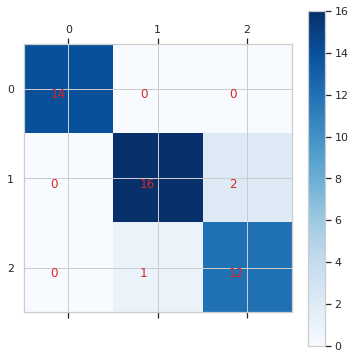

In [15]:
def plot_confusion_matrix (Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(3), range(3))
    plt.xticks(range(3), range(3))
    plt.colorbar()
    for i in range(3):
        for j in range(3):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')


plot_confusion_matrix(Y_test,Y_pred)

calculate the accuracy using sklearn

In [16]:
print ("Accuracy =", accuracy_score(Y_test, Y_pred))

Accuracy = 0.9333333333333333


visualize the parameters of the GuassianNB after training , store theta in ``centers`` and sigma in ``variances``  

In [17]:
variances= model.sigma_
centers = model.theta_
print('variances :\n',variances)
print('\n centers :',centers)

variances :
 [[0.11076389 0.13749229 0.02712192 0.01166667]
 [0.28389649 0.11234375 0.22859375 0.04280274]
 [0.39589482 0.08560994 0.33687363 0.07751644]]

 centers : [[4.94166667 3.35277778 1.46944444 0.23333333]
 [5.928125   2.7375     4.2125     1.303125  ]
 [6.52432432 2.99189189 5.53513514 2.02432432]]


complete this code to reproduce the plot below 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

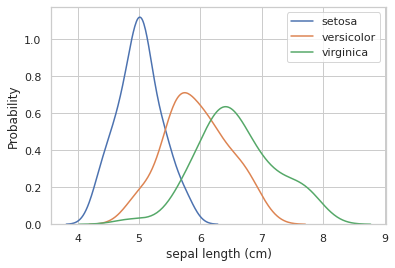

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

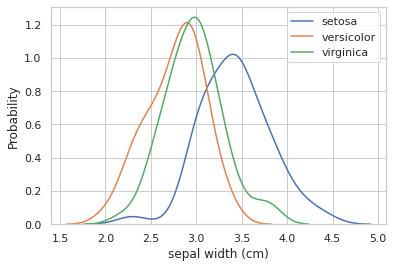

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

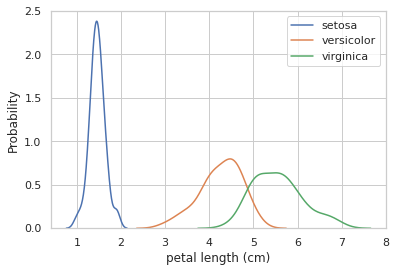

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

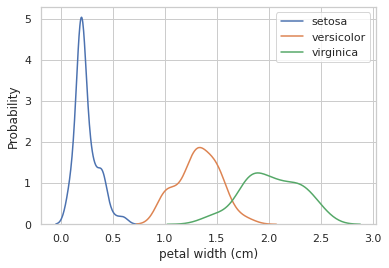

In [18]:
sns.set_theme(style="whitegrid")
target_0 = df.loc[df['target'] == 0]
target_1 = df.loc[df['target'] == 1]
target_2 = df.loc[df['target'] == 2]
F = ['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

for x in F: 
  fig, ax = plt.subplots()
  x1=target_0[[x]]
  x2=target_1[[x]] 
  x3=target_2[[x]] 

  ax=sns.distplot(x1, label='setosa',hist=False)
  ax=sns.distplot(x2,label='versicolor',hist=False)
  ax=sns.distplot(x3,label='virginica',hist=False)

  ax.set_xlabel((f"{x}"))
  ax.set_ylabel('Probability')
  ax.legend(loc=0)
  plt.show()